In [94]:
#import libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt', 'wordnet', 'omw-1.4', 'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [95]:
df = pd.read_csv('IMDB_Dataset.csv')

In [96]:
#to tokenizer dataset and print first row for example
tokenizer = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+')
df['Tokenized_Text'] = df['review'].apply(lambda x: tokenizer.tokenize(str(x)))
print(df['Tokenized_Text'].iloc[0])

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', "you'll", 'be', 'hooked', 'They', 'are', 'right', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me', 'br', 'br', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO', 'Trust', 'me', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs', 'sex', 'or', 'violence', 'Its', 'is', 'hardcore', 'in', 'the', 'classic', 'use', 'of', 'the', 'word', 'br', 'br', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where',

In [97]:
# some information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   Tokenized_Text  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [98]:
# to see 5 first rows
df.head()

,review,sentiment,Tokenized_Text
0,One of the other reviewers has mentioned that ...,positive,"[One, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,"[A, wonderful, little, production, br, br, The..."
2,I thought this was a wonderful way to spend ti...,positive,"[I, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,"[Basically, there's, a, family, where, a, litt..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[Petter, Mattei's, Love, in, the, Time, of, Mo..."


In [99]:
# to clean dataset and convert it to lower case
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text
df['cleaned_review'] = df['review'].apply(clean_text)

In [100]:
#to see first rows after cleaning
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love in the time of money is a ...


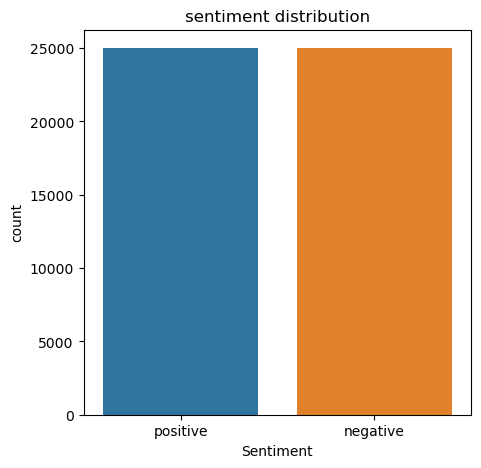

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [101]:
# chek imbalancing in dataset
sentiment_count = df['sentiment'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values)
plt.title('sentiment distribution')
plt.ylabel('count')
plt.xlabel('Sentiment')
plt.show()
sentiment_count

###### if it was imbalance, we can balance it by this code:

from imblearn.under_sampling import RandomUnderSampler

balance = RandomUnderSampler(random_state= 0)
df_balance,df_balance['sentiment']=balance.fit_resample(df[['review']],df['sentiment'])


In [102]:
#applies stemming to a sample of reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return tokens
sample_reviews = df['review'][:1000].apply(preprocess_text)

In [103]:
from collections import Counter
all_words = [word for review in sample_reviews for word in review]
word_freq = Counter(all_words)
top_10_words = word_freq.most_common(10)
for word, count in top_10_words:
    print(f'{word}: {count}')

br: 4124
movi: 2056
film: 1822
one: 1012
like: 844
see: 614
get: 608
make: 574
watch: 567
time: 552


In [104]:
#text calssification
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df['review']
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vect = TfidfVectorizer()
x_train_tf = tfidf_vect.fit_transform(x_train)
x_test_tf = tfidf_vect.transform(x_test)
model = MultinomialNB()
model.fit(x_train_tf, y_train)
y_pred = model.predict(x_test_tf)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion_matrix}")
classification_report = metrics.classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Accuracy: 0.8635
Confusion Matrix:
[[4405  556]
 [ 809 4230]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Axes: >

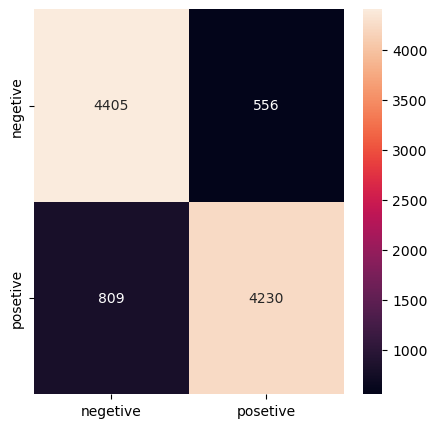

In [105]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True, fmt='' , xticklabels = ['negetive','posetive'] , yticklabels = ['negetive','posetive'])

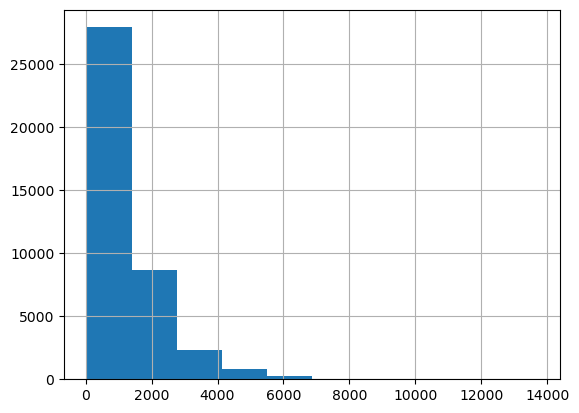

count    40000.000000
mean      1308.413825
std        991.345982
min         32.000000
25%        698.000000
50%        970.000000
75%       1590.000000
max      13704.000000
dtype: float64

In [106]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

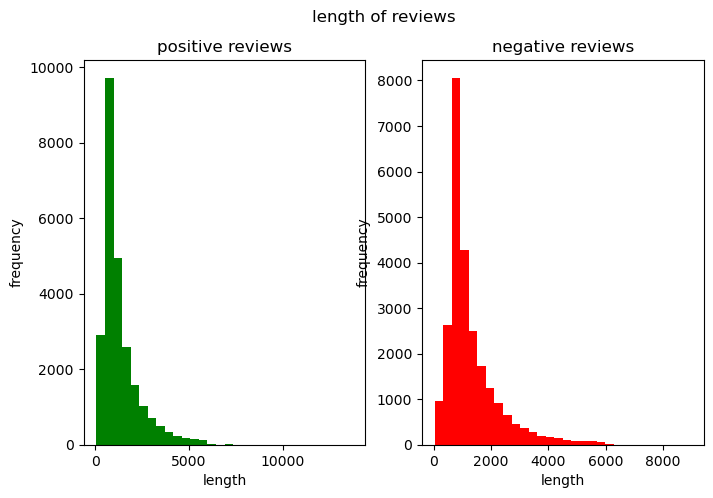

In [112]:
import matplotlib.pyplot as plt
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ax1.hist(df.loc[df['sentiment'] == 1, 'review'].str.len(), bins=30, color='green')
ax1.set_title('positive reviews')
ax1.set_xlabel('length')
ax1.set_ylabel('frequency')
ax2.hist(df.loc[df['sentiment'] == 0, 'review'].str.len(), bins=30, color='red')
ax2.set_title('negative reviews')
ax2.set_xlabel('length')
ax2.set_ylabel('frequency')
fig.suptitle('length of reviews')
plt.show()

In [108]:
min_len_positive = text_len_positive.min()
max_len_positive = text_len_positive.max()
mean_len_positive = text_len_positive.mean()
min_len_negative = text_len_negative.min()
max_len_negative = text_len_negative.max()
mean_len_negative = text_len_negative.mean()
print("Positive Reviews:")
print(f"Minimum Length: {min_len_positive}")
print(f"Maximum Length: {max_len_positive}")
print(f"Mean Length: {mean_len_positive}")
print("\nNegative Reviews:")
print(f"Minimum Length: {min_len_negative}")
print(f"Maximum Length: {max_len_negative}")
print(f"Mean Length: {mean_len_negative}")

Positive Reviews:
Minimum Length: nan
Maximum Length: nan
Mean Length: nan

Negative Reviews:
Minimum Length: nan
Maximum Length: nan
Mean Length: nan


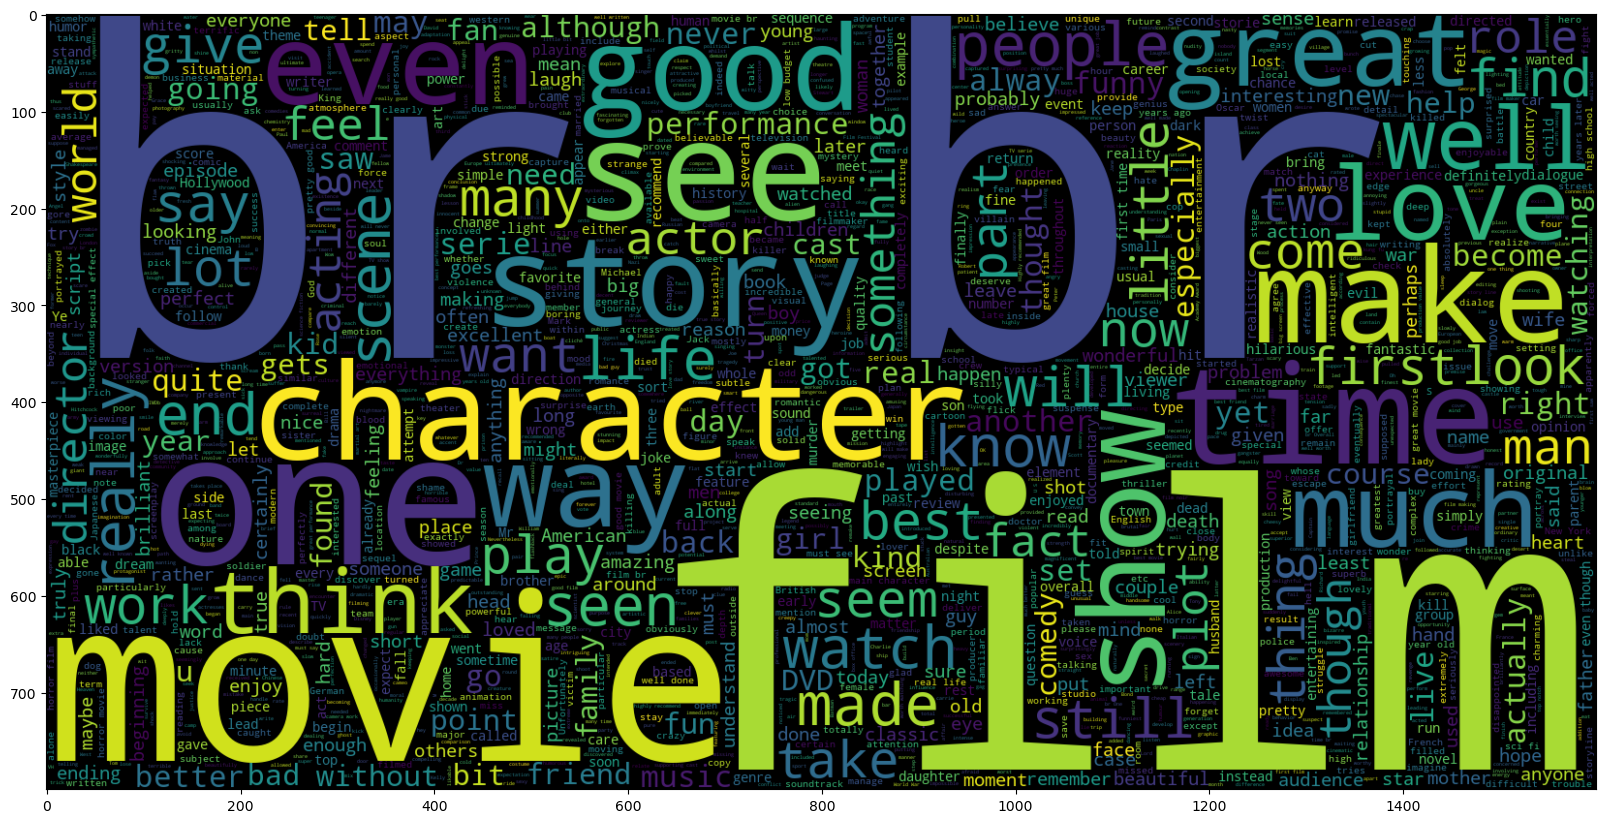

In [109]:
#posetive world cloud
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

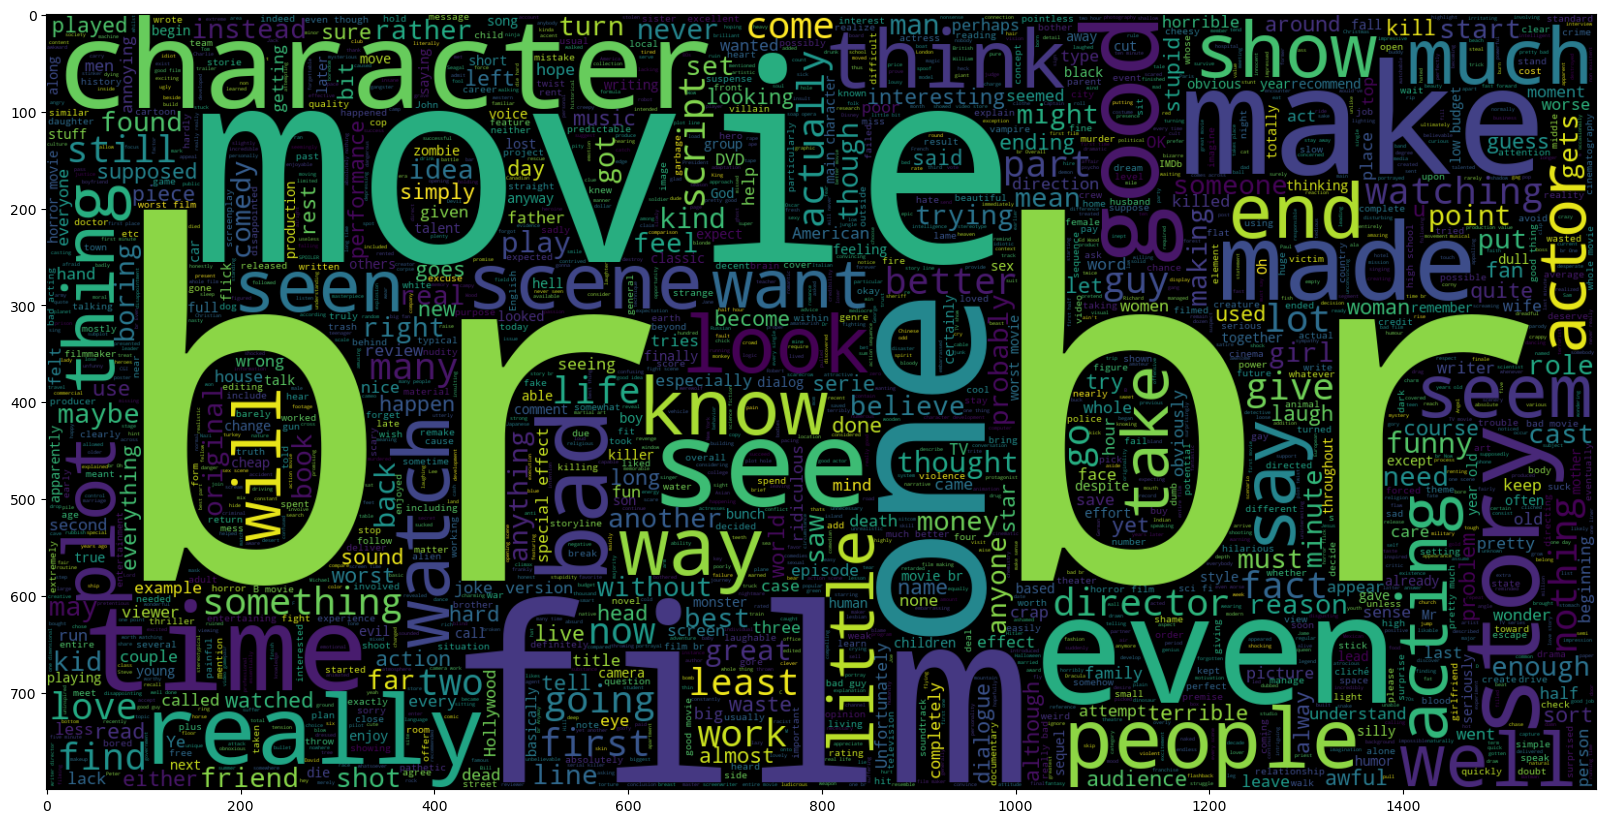

In [110]:
plt.figure(figsize = (20,20)) # Negetive Review Text
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 0].review))
plt.imshow(wc , interpolation = 'bilinear')

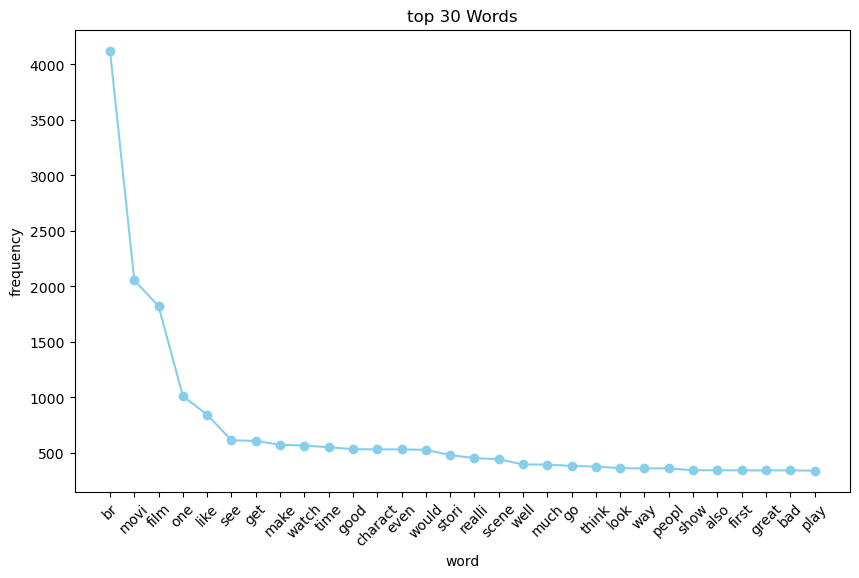

In [111]:
from collections import Counter
import matplotlib.pyplot as plt
all_words = [word for review in sample_reviews for word in review]
word_freq = Counter(all_words)
top_30_words = word_freq.most_common(30)
words, counts = zip(*top_30_words)
plt.figure(figsize=(10, 6))
plt.plot(words, counts, marker='o', linestyle='-', color='skyblue')
plt.title('top 30 Words')
plt.xlabel('word')
plt.ylabel('frequency')
plt.xticks(rotation=45)
plt.show()